In [12]:
import matplotlib.pyplot as plt

In [2]:


from dask.distributed import Client

client = Client(threads_per_worker=1)
client



/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39033 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39033/status,
Dashboard: /proxy/39033/status,Workers: 2
Total threads: 2,Total memory: 7.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43669,Workers: 2
Dashboard: /proxy/39033/status,Total threads: 2
Started: Just now,Total memory: 7.00 GiB
Comm: tcp://127.0.0.1:46103,Total threads: 1
Dashboard: /proxy/44785/status,Memory: 3.50 GiB
Nanny: tcp://127.0.0.1:36801,


In [3]:
import xarray as xr

In [4]:
ls /g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/cice_025deg

grid.nc@  i2o.nc@  kmt.nc  monthly_sstsss.nc@  o2i.nc@  u_star.nc@


In [5]:
grid_ds=xr.open_dataset('/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/cice_025deg/grid.nc')

0.3.0


In [6]:
grid_ds

<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    ulat     (ny, nx) float64 ...
    ulon     (ny, nx) float64 ...
    tlat     (ny, nx) float64 ...
    tlon     (ny, nx) float64 ...
    htn      (ny, nx) float64 ...
    hte      (ny, nx) float64 ...
    angle    (ny, nx) float64 ...
    angleT   (ny, nx) float64 ...
    tarea    (ny, nx) float64 ...
    uarea    (ny, nx) float64 ...

In [7]:
cice_ds=xr.open_dataset('/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle6/output309/ice/OUTPUT/iceh.1962-01.nc')

In [8]:
cice_ds

<xarray.Dataset>
Dimensions:         (time: 1, d2: 2, nj: 1080, ni: 1440, nc: 5)
Coordinates:
  * time            (time) datetime64[ns] 1962-02-01
    TLON            (nj, ni) float32 ...
    TLAT            (nj, ni) float32 ...
    ULON            (nj, ni) float32 ...
    ULAT            (nj, ni) float32 ...
    NCAT            (nc) float32 ...
Dimensions without coordinates: d2, nj, ni, nc
Data variables: (12/85)
    time_bounds     (time, d2) datetime64[ns] ...
    tmask           (nj, ni) float32 ...
    blkmask         (nj, ni) float32 ...
    tarea           (nj, ni) float32 ...
    uarea           (nj, ni) float32 ...
    dxt             (nj, ni) float32 ...
    ...              ...
    aicen_m         (time, nc, nj, ni) float32 ...
    vicen_m         (time, nc, nj, ni) float32 ...
    fsurfn_ai_m     (time, nc, nj, ni) float32 ...
    fcondtopn_ai_m  (time, nc, nj, ni) float32 ...
    fmelttn_ai_m    (time, nc, nj, ni) float32 ...
    flatn_ai_m      (time, nc, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model (CICE) Version 5
    comment:      This Year Has 365 days
    comment2:     File written on model date 19620201
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2021-04-19 at 22:08:54.3
    io_flavor:    io_netcdf

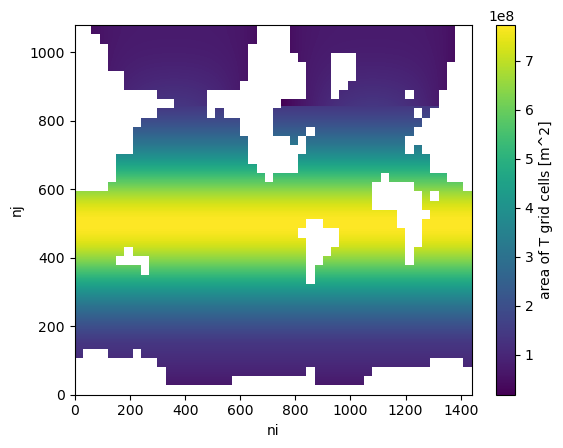

In [9]:
cice_ds.tarea.plot()

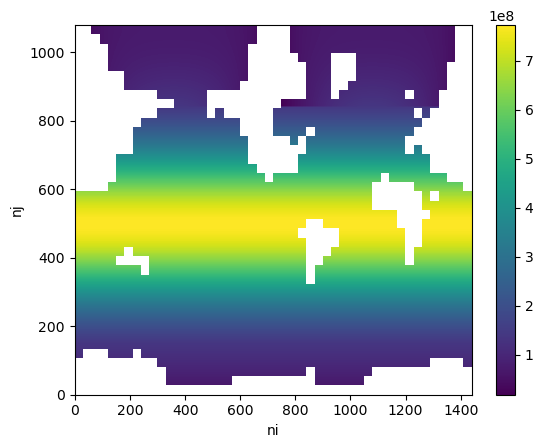

In [10]:
(cice_ds.dxu*cice_ds.dyu).plot()

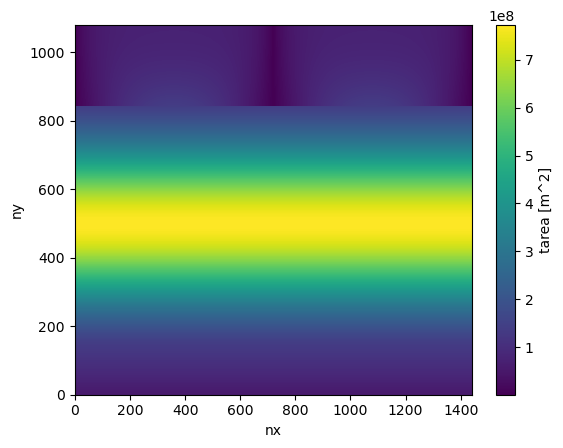

In [21]:
grid_ds.tarea.plot()

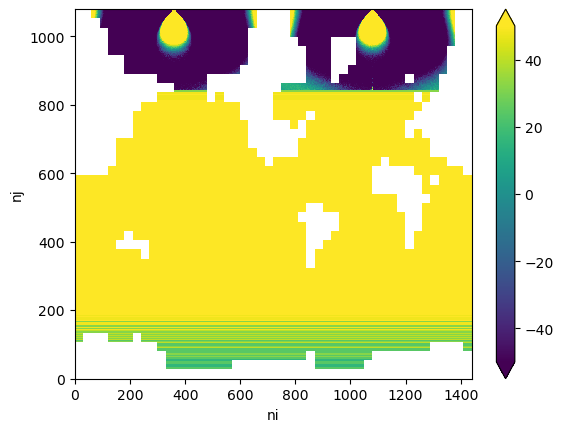

In [11]:
(cice_ds.tarea-(cice_ds.dxt*cice_ds.dyt)).plot(vmin=-50, vmax=50)

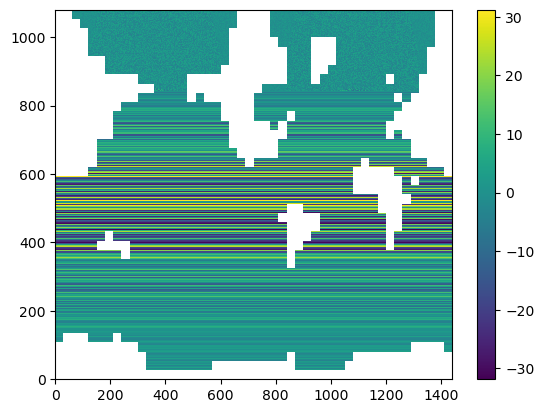

In [15]:
plt.pcolormesh((grid_ds.tarea.values-cice_ds.tarea.values))
plt.colorbar()

(array([[21., 35., 33., ..., 28., 27., 18.],
        [21., 35., 33., ..., 28., 27., 18.],
        [21., 35., 33., ..., 28., 27., 18.],
        ...,
        [21., 35., 33., ..., 28., 27., 18.],
        [21., 35., 33., ..., 28., 27., 18.],
        [21., 35., 33., ..., 28., 27., 18.]]),
 array([-31.87116671, -25.56020305, -19.2492394 , -12.93827574,
         -6.62731209,  -0.31634843,   5.99461522,  12.30557888,
         18.61654253,  24.92750618,  31.23846984]),
 <a list of 1440 BarContainer objects>)

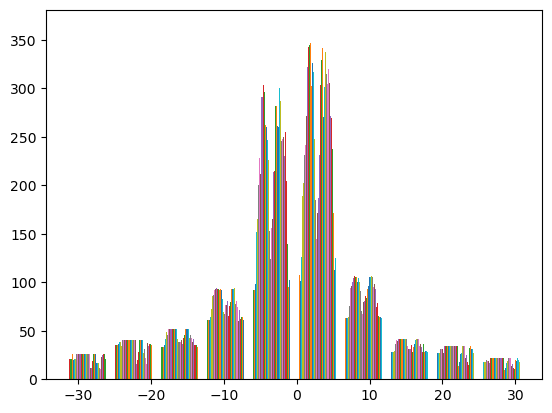

In [22]:
plt.hist(grid_ds.tarea.values-cice_ds.tarea.values)

In [15]:
grid_ds.hte

<xarray.DataArray 'hte' (ny: 1080, nx: 1440)>
[1555200 values with dtype=float64]
Dimensions without coordinates: ny, nx
Attributes:
    units:    cm
    title:    Width of T cells on East side.

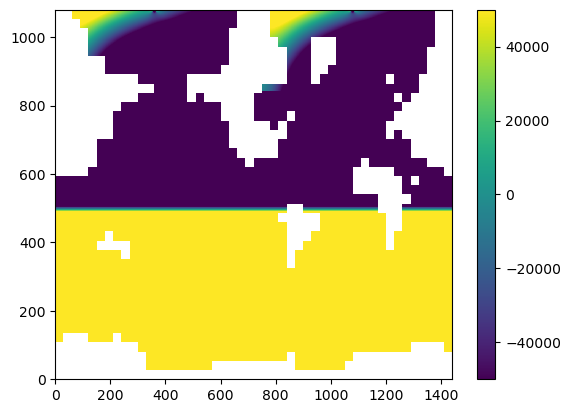

In [25]:
plt.pcolormesh(((grid_ds.hte/100)*(grid_ds.htn/100)).values-cice_ds.uarea.values, vmin=-50000, vmax=50000)
plt.colorbar()

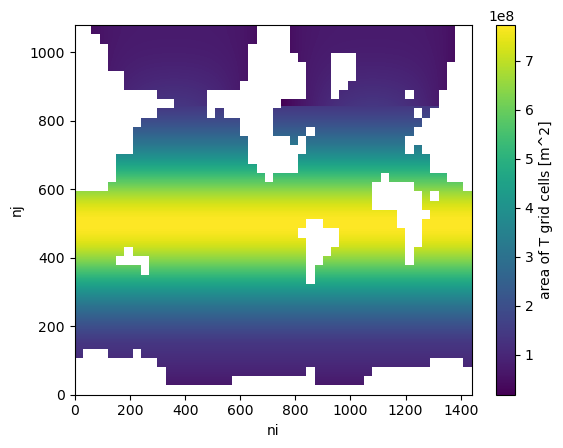

In [26]:
cice_ds.tarea.plot()